# Pymaceuticals Inc.
---

### Analysis

The results for the 4 specific drugs studied appeared to be evenly divided between male and female mice.  The tumor volume appears lower among mice being given Capomuline and Ramicane. 
The tumor volume appeared larger in the mice that weighed more.

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats 
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mstudy_results = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")


# Display the data table for preview
mstudy_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mstudy_results["Mouse ID"].nunique()



249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_df = mstudy_results.loc[mstudy_results[['Mouse ID', 'Timepoint']].duplicated(keep=False)]
dup_mice_df["Mouse ID"].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = mstudy_results.loc[mstudy_results[['Mouse ID', 'Timepoint']].duplicated(keep=False)]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mstudy_results_clean = mstudy_results.loc[mstudy_results["Mouse ID"]!="g989"]
mstudy_results_clean


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
mstudy_results_clean["Mouse ID"].nunique()


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tv_mean_grp = mstudy_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)" ].mean()
tv_median_grp = mstudy_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)" ].median()
tv_var_grp = mstudy_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)" ].var()
tv_stddev_grp = mstudy_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)" ].std()
tv_sem_grp = mstudy_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)" ].sem()

mstudy_sum = pd.DataFrame({"Mean Tumor Volume" : tv_mean_grp, "Median Tumor Volume" : tv_median_grp, "Tumor Volume Variance" : tv_var_grp, "Tumor Volume Std. Dev." : tv_stddev_grp, "Tumor Volume Std Err." : tv_sem_grp})
mstudy_sum



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: xlabel='Data Regimen', ylabel='# of Observed Mouse Timepoint'>

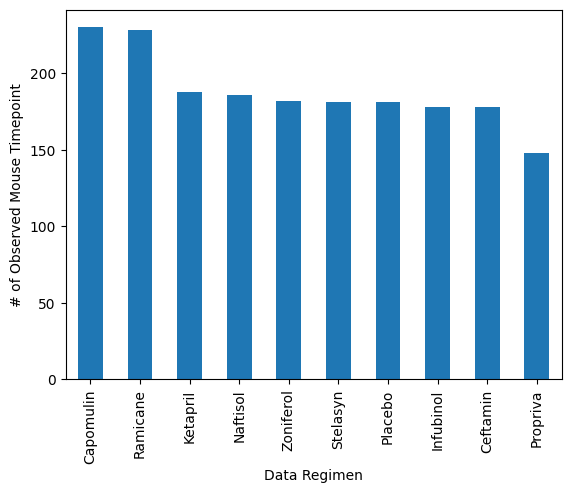

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Received assistance from AskBCS on this area

counts_df = mstudy_results_clean["Drug Regimen"].value_counts()
counts_df.plot.bar(x="Drug Regimen", y="Timepoint", rot=90, xlabel="Data Regimen", ylabel= "# of Observed Mouse Timepoint")



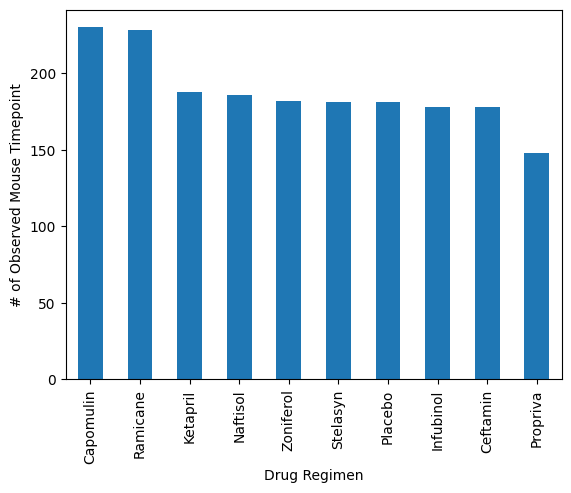

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

counts_df.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoint")
plt.xticks(rotation=90)
plt.show()


<Axes: ylabel='Male'>

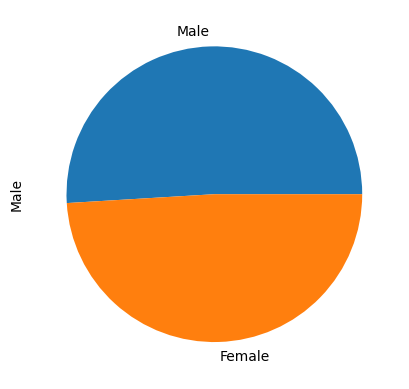

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = mstudy_results_clean["Sex"].value_counts()
gender_df.plot.pie(y="Sex", xlabel="Female", ylabel="Male")



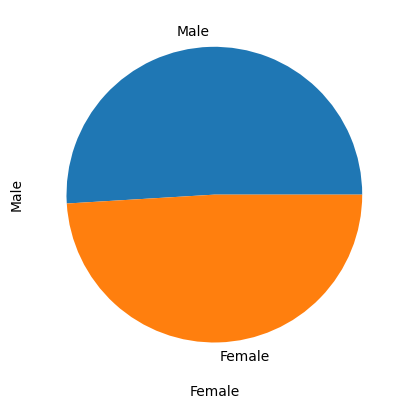

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df.plot(kind="pie")
plt.xlabel("Female")
plt.ylabel("Male")
plt.show()




## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
mouse_time_grp = mstudy_results_clean.groupby(["Mouse ID"])["Timepoint"].max()

mouse_time_grp = mouse_time_grp.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mstudy_maxtime_df = mouse_time_grp.merge(mstudy_results_clean, on=["Mouse ID", "Timepoint"], how="left")
mstudy_maxtime_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for drug in drug_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = mstudy_maxtime_df.loc[mstudy_maxtime_df["Drug Regimen"] ==drug,'Tumor Volume (mm3)']

    # add subset 
    tumor_vol_data.append(tumor_vol)

    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

     # Determine outliers using upper and lower bounds

    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f'{drug} outliers value are : {outliers}')
    



Capomulin outliers value are : Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers value are : Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers value are : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers value are : Series([], Name: Tumor Volume (mm3), dtype: float64)


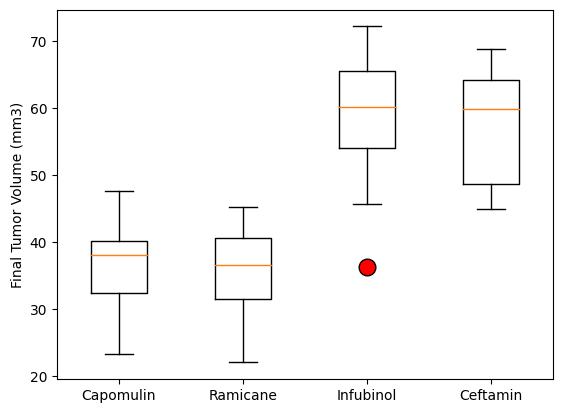

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_data, labels = drug_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

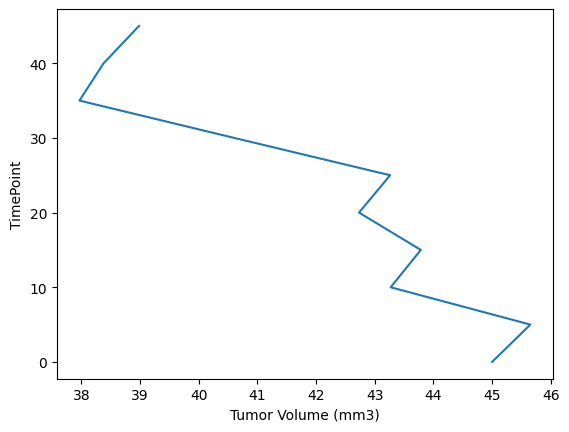

In [42]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_mouse_df = mstudy_results_clean.loc[mstudy_results_clean["Drug Regimen"] == "Capomulin"]
sngl_cap_mouse = cap_mouse_df.loc[cap_mouse_df["Mouse ID"] == 'b128']
time = sngl_cap_mouse['Timepoint']
t_volume = sngl_cap_mouse["Tumor Volume (mm3)"]
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("TimePoint")
plt.plot(t_volume, time)
plt.grid
plt.show()


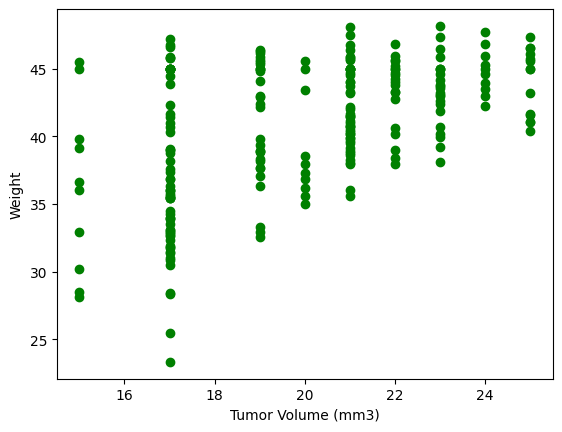

In [49]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

weight = cap_mouse_df["Weight (g)"]
t_vol = cap_mouse_df["Tumor Volume (mm3)"]
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight")

plt.scatter(weight, t_vol, marker = "o", facecolors="green")
plt.show()


## Correlation and Regression

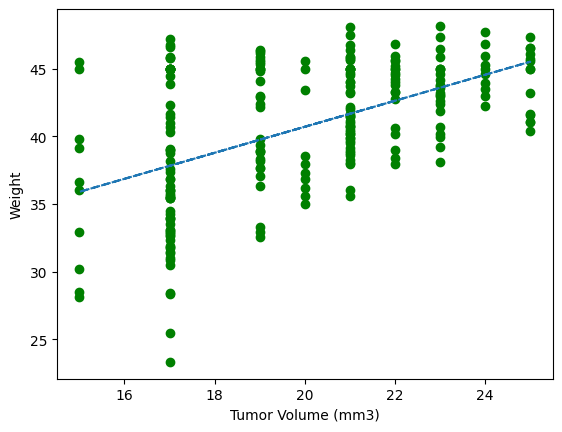

In [57]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(weight, t_vol)
pe_fit = pe_slope * weight + pe_int

plt.scatter(weight, t_vol, marker = "o", facecolors="green")
plt.plot(weight,pe_fit,"--")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight")
plt.show()